### 신경망과 머신러닝 차이점
#### 1) (레이어) 머신러닝은 여러 알고리즘을 이용해 예측하고 신경망은 여러 계층으로 구성된 신경망 모델을 사용해 예측
#### 2) (특징추출) 머신러닝은 데이터의 특징을 사람이 줘야 하는데 신경망은 입력데이터로부터 특징을 알아서 추출해 학습
#### 3) (학습난이도) 신경망은 머신러닝에 비해 상대적으로 복잡한 연산과 학습에 강해 GPU사용
#### 4) (전이학습) 신경망은 다른 데이터로 학습한 기존의 학습모델을 불러와 재사용이 용이 - > 학습시간 단축, 성능 보장, 도메인이 달라도 됨
#### 5) (유용성) 신경망은 학습설명이 어려우므로 추천, 번역, 컴퓨터비전 등 동작만 잘 하면 되는 경우에 유용
---
### 합성곱신경망(Convolution neural network)
### 신경망은 기본적으로 전 결합층(FCN, Dense)이 여러 레이어로 연결된 구성으로 이전 단계의 출력층이 다음 단계의 입력층이 됨
#### 1) (합성곱, CNN) 이미지 경우 이미지 크기, 위치가 상이해 필터크기로 입력데이터와 연산해 예측하는 CNN기법 사용  
##### - 일반MLP 성능이 높이기 위해 이미지 크기를 동일하게 변형해줘야 학습성능이 개선된다.
#### 2) CNN은 전결합층 사용하지 않고 대부분계층에서는 좁은 면적 단위로 입력데이터에 대해 필터링하여 그 결과를 다음 계층으로 전달
##### - 공간상위치에 상관없이 이미지 특징을 추출하기 위함이며 이렇게 나온 결과 특성맵(feature map)이라 함
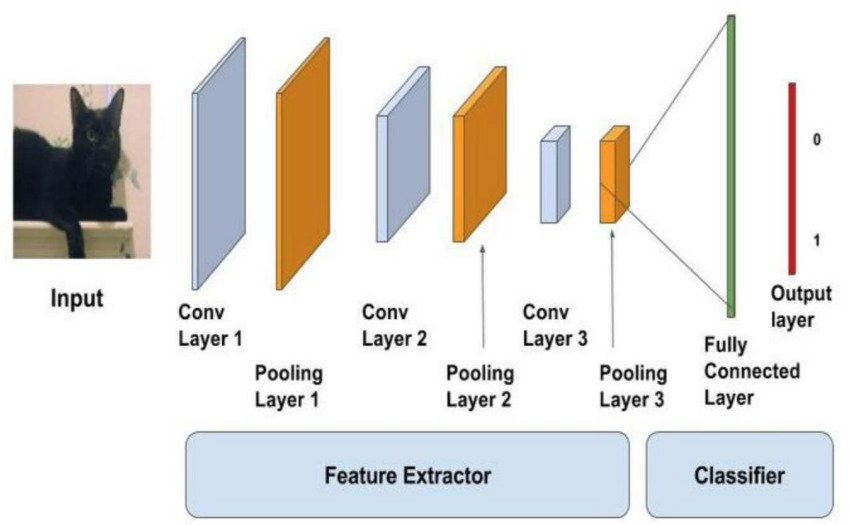
#### 3) 특성맵 : CNN는 수십 ~수백가지 특성을 만드는데 찾아야 할 패턴(가로, 세로, 대각선, 성분 등) 이 여러가지 이기때문에
##### - 입력데이터에 필터크기(커널) 일정간격(strides) 이동해가면서 행렬곱셈하면서 연산하여 특징맵을 출력값으로 도출
##### - model.add(layers.Conv2D(필터갯수, 필터크기, activation = 활성화함수, input_shape = 입력크기)
##### - model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
##### - 이런 경우 하이퍼파라미터수(입력 * 출력 * 필터크기 + 편향)는 1* 32 * 3 * 3 + 32 = 320가 생김
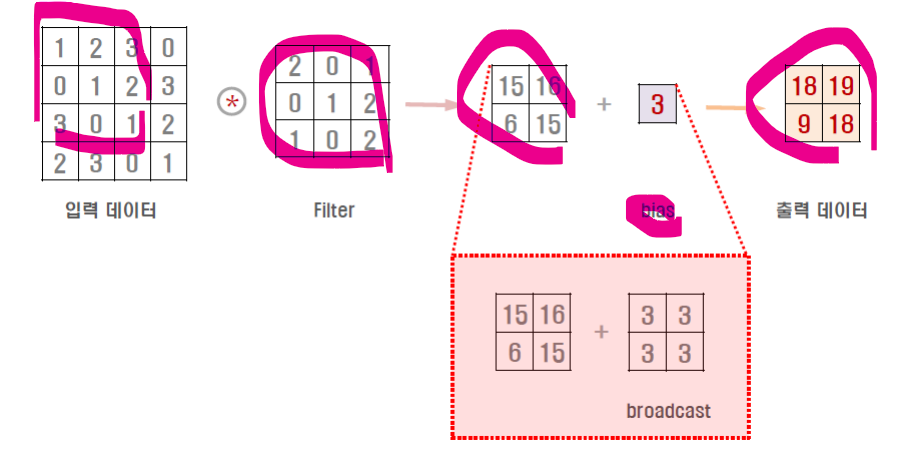


#### 패딩(Padding) 필터크기(커널)은 임의로 지정하게 되는데 이로 인해 가장자리부분의 데이터가 부족해지므로 0으로 채움
##### - valid : 패딩을 안함
##### - same : 출력차원과 입력차원이 같아지도록 적절한 수의 패딩을 자동 채움
#### 축소샘플링(sub-sampling) 합성곱결과를 출력층에 전달할 때 가장 특징이 있는 값을 전달하여 전달하는 정보를 줄이기 위함 
##### - 스트라이드와 패딩기법이 있음
##### - 스트라이드(strides) 입력데이터와 필터(커널) 행렬곱할때 건너뛰는 이동폭(픽셀) - 출력 특성맵이 줄어듦
##### - 풀링(Pooling) 축소샘플링은 주로 풀링을 통해 수행하는데 합성곱결과를 출력층에 전달할때 가장 큰값(평균값)을 선택하여 전달
#### 과대적합 해소 : Pooling, Dropout, augmentation(데이터확장) 기법을 사용
#### - augmentation : 과적합방지를 위해 이미지를 좌,후,상,하, 뒤집기,회전하여 새로운 이미지인것처럼 변환
#### - from keras.preprocessing.image import ImageDataGenerator 을 사용하여 이미지를 변형하여 증강함
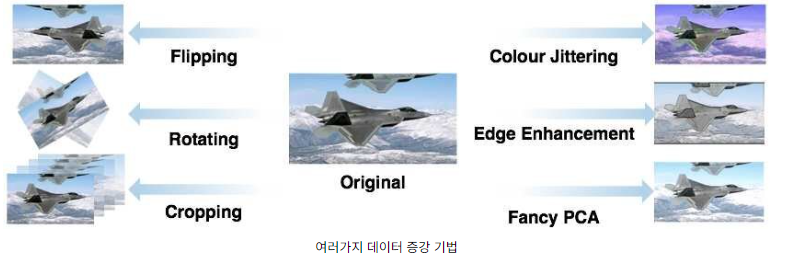

---
## MLP방식으로 MNiST이미지 학습
### 1) 데이터를 정수로 모두 치환
### 2) 학습용 훈련용 데이터 분할
### 3) 독립변수 넘파이배열로 변환
### 4) 독립변수 정규화
### 5) 종속변수 One-Hot Encoding
### 6) MLP모델생성
#### - 1) Sequential 모델 생성
#### - 2) FCN 전 결합층생성 - 입력값 784개, 출력값 100, 활성화함수 relu
#### - 3) 과적합해소를 위해 Dropout레이어 추가
#### - 4) FCN 전 결합층생성 - 입력값 100개, 출력값 64, 활성화함수 relu
#### - 5) 최종 출력 FCN 전 결합층생성 - 입력값 64개, 출력값 10, 활성화함수 softmax
### 7) MLP모델 컴파일
#### - 1) 손실함수 : 다중분류용 categorical_crossentropy 
#### - 2) 옵티마이저 : 오차손실 미분을 위해 adam
#### - 3) 성능평가 : 정확도확인을 위해 acc
### 8) MLP모델 학습
#### - 1) 데이터 : 학습용 독립변수, 학습용 종속변수
#### - 2) 반복횟수 : epochs 5 
#### - 3) 배치사이즈 : 32개씩 입력데이터를 읽은 후 성능오차 갱신
### 9) MLP모델 성능검증
#### - 1) 데이터 : 검증용 독립변수, 검증용 종속변수

In [1]:
from keras import layers, models
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

In [2]:
ddf = pd.read_csv('./data/mnist_784_csv.csvv')
x = ddf.drop(['class'], axis=1)
y =ddf['class']
train_x = x[:60000]
test_x = x[60000:]
train_y = y[:60000]
test_y = y[60000:]

In [3]:
train_x = np.array(train_x)
test_x = np.array(test_x)

In [4]:
train_x.min(), train_x.max()

(0, 255)

In [5]:
train_x = train_x.astype('float32') /255
test_x = test_x.astype('float32') /255

In [6]:
train_x.min(), train_x.max()

(0.0, 1.0)

In [7]:
train_label = to_categorical(train_y)
test_label = to_categorical(test_y)

In [8]:
train_label.shape,test_label.shape

((60000, 10), (10000, 10))

In [9]:
train_x.shape,test_x.shape

((60000, 784), (10000, 784))

In [44]:
mlpmodel = models.Sequential()
mlpmodel.add(layers.Dense(100, activation = 'relu', input_shape=(784,)))
mlpmodel.add(layers.Dropout(0.2))
mlpmodel.add(layers.Dense(64, activation='relu'))
mlpmodel.add(layers.Dense(10, activation='softmax'))
mlpmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                6464      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 85,614
Trainable params: 85,614
Non-trainable params: 0
_________________________________________________________________


In [49]:
mlpmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [50]:
mlpmodel.fit(train_x, train_label, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3031 - acc: 0.9102
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1481 - acc: 0.9544
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1165 - acc: 0.9637
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0971 - acc: 0.9696
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0851 - acc: 0.9728


In [51]:
test_loss, test_acc = mlpmodel.evaluate(test_x, test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.0765 - acc: 0.9761


---
## CNN방식으로 이미지데이터 분류
### 1) CNN는 입력데이터가 2차원 텐션형식이어야 함
#### - 입력데이터가 1차원인 경우 2차원으로 변환하여 데이터를 입력해줘야함 - reshape
### 2) 입력데이터가 2차원이상인 경우(input_shape = (28,28,1)) 분류 예측을 위해 1차원으로 평활화 필요
#### - flatten()함수를 이용해 평활화를 하고 그결과를 출력층으로 보낸다
#### - 입력데이터가 1차원인 경우(input_shape = (784,)) 평활화작업이 필요없음
### 3) CNN계층은 컨볼루션 + 풀링이 한 쌍이며 이를 통해 이미지의 크기(너비,높이)는 줄고 채널수는 증가
#### - 여러 층이 많을수록 기본 패턴에서 복잡한 패턴을 찾게 되는데 연산식이 많아져 성능저하 발생 --> GPU사용
### 4) MLP는 입력데이터의 특성을 한번에 학습한다면 CNN은 지역적인 특성을 작은단위로 나누어 패턴을 찾고 학습
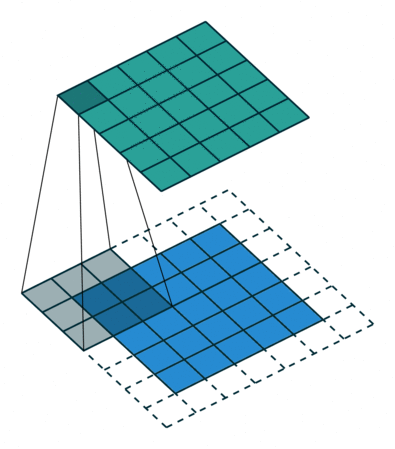
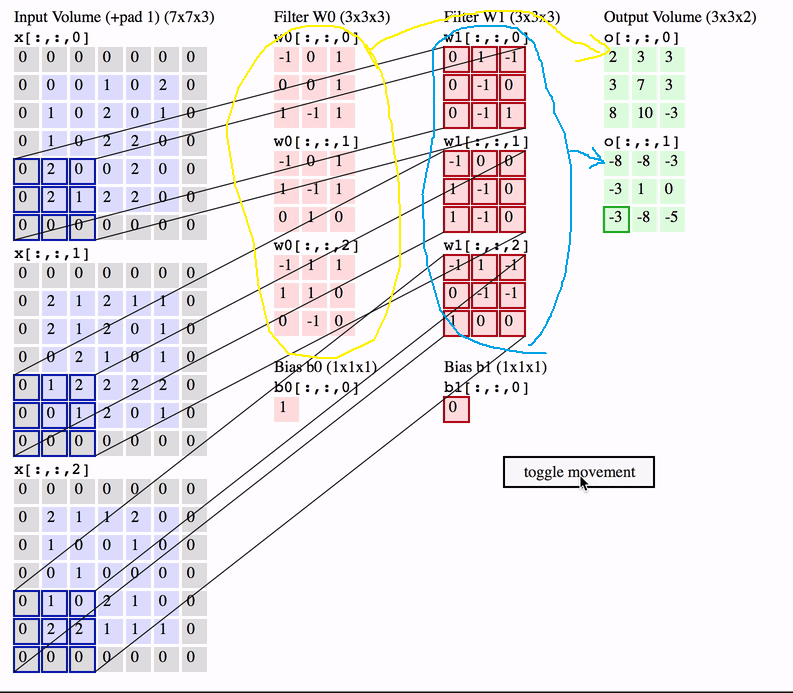

In [60]:
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

In [ ]:
#plt.imshow(train_images[0],cmap=plt.cm.binary)
#plt.show()

In [10]:
#train_images[0]

In [ ]:
# 입력을 1차원으로 변경(MLP)
#train_images = train_images.reshape((60000, 28, 28, 1))
#train_images.shape

In [ ]:
#train_images = train_images.astype('float32') / 255
#test_images = test_images.reshape((10000, 28, 28, 1))
#test_images = test_images.astype('float32') / 255

In [ ]:
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

In [17]:
train_x.shape,test_x.shape

((60000, 784), (10000, 784))

In [25]:
cnn_train_x = train_x.reshape((60000,28,28,1))
cnn_test_x = test_x.reshape((10000,28,28,1))

In [28]:
cnn_train_x.shape,cnn_test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation='relu', input_shape = (28,28,1)))
model.add(layers.Conv2D(64, 5, activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(32,3, activation='relu'))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32,3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
          

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 32)          9

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [24]:
model.fit(cnn_train_x, train_label, epochs=3, batch_size=64) 

Epoch 1/3
938/938 [==============================] - 93s 98ms/step - loss: 0.1893 - acc: 0.9406
Epoch 2/3
938/938 [==============================] - 86s 92ms/step - loss: 0.0545 - acc: 0.9829
Epoch 3/3
938/938 [==============================] - 91s 97ms/step - loss: 0.0400 - acc: 0.9873


In [26]:
test_loss, test_acc = model.evaluate(cnn_test_x, test_label)

313/313 [==============================] - 4s 12ms/step - loss: 0.0493 - acc: 0.9852


In [27]:
test_acc

0.9851999878883362